* Name : Sanjeev Thapa
* Mphil ICT 2081
* Roll No:
* Sub: Data Science


# Assignment: SVD example case analysis

**"Nine agricultural researchers from different regions rate seven farming techniques (like drip irrigation, crop rotation, organic fertilization, etc.) based on their effectiveness. Use SVD to discover the underlying concepts or patterns in agricultural practices and how strongly each technique aligns with these concepts."**



---



---



---



# Problem Statement
Nine agricultural researchers from different regions rated seven farming techniques on their effectiveness (scale 1-10). We want to:

* Identify latent concepts that explain patterns in technique effectiveness

* Understand which techniques group together based on researcher ratings

* Discover which researchers have similar evaluation patterns

Data Matrix (A)
* Rows: Researchers (R1-R9)
* Columns: Farming Techniques

    * Drip Irrigation (DI)

    * Crop Rotation (CR)

    * Organic Fertilization (OF)

    * Integrated Pest Management (IPM)

    * Conservation Tillage (CT)

    * Agroforestry (AF)

    * Precision Agriculture (PA)

* R1 | 8 6 7 5 4 5 9  # Expert 1 (possibly from an arid region)
* R2 | 7 5 6 6 5 6 8  # Expert 2 (favors chemical methods)
* R3 | 9 7 8 4 3 4 8
* R4 | 5 8 6 7 6 7 4
* R5 | 6 9 7 8 7 8 5
* R6 | 4 7 5 9 8 9 3
* R7 | 3 5 4 8 7 7 2
* R8 | 7 4 5 3 2 3 7
* R9 | 8 5 6 2 1 2 8 # Expert 7

# Python Implementation

In [2]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Rating matrix (9 researchers × 7 techniques)
A = np.array([
    [8, 6, 7, 5, 4, 5, 9],
    [7, 5, 6, 6, 5, 6, 8],
    [9, 7, 8, 4, 3, 4, 8],
    [5, 8, 6, 7, 6, 7, 4],
    [6, 9, 7, 8, 7, 8, 5],
    [4, 7, 5, 9, 8, 9, 3],
    [3, 5, 4, 8, 7, 7, 2],
    [7, 4, 5, 3, 2, 3, 7],
    [8, 5, 6, 2, 1, 2, 8]
])

In [3]:

# Perform SVD
U, s, Vt = svd(A)

# Keep top 2 concepts for visualization
k = 2
U_k = U[:, :k]
Sigma_k = np.diag(s[:k])
Vt_k = Vt[:k, :]

print("Singular values:", s)
print("\nConcept strengths:", s[:2])
print("\nTechnique-Concept relationships (Vt):\n", Vt_k)
print("\nResearcher-Concept relationships (U):\n", U_k)


Singular values: [46.85782676 14.12707725  3.48071642  1.03661568  0.64811013  0.39229726
  0.0765318 ]

Concept strengths: [46.85782676 14.12707725]

Technique-Concept relationships (Vt):
 [[-0.40130836 -0.40603993 -0.386319   -0.37844034 -0.31505986 -0.37234787
  -0.37910165]
 [ 0.44169362 -0.07401863  0.18834933 -0.40439635 -0.41533938 -0.37442095
   0.53639375]]

Researcher-Concept relationships (U):
 [[-0.35804125  0.26049141]
 [-0.34722297  0.09863381]
 [-0.35267859  0.34641061]
 [-0.34647485 -0.21602256]
 [-0.40278598 -0.22322423]
 [-0.358403   -0.46240979]
 [-0.28548018 -0.42346485]
 [-0.25398338  0.3061605 ]
 [-0.26480165  0.4680181 ]]


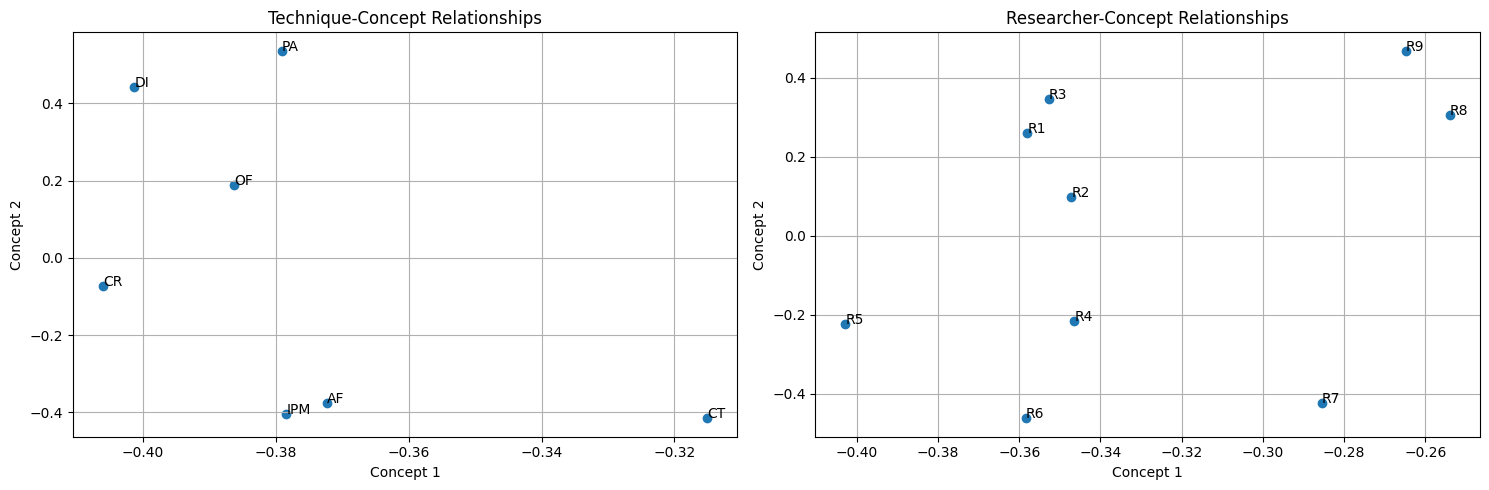

In [4]:
# Visualization
techniques = ['DI', 'CR', 'OF', 'IPM', 'CT', 'AF', 'PA']
researchers = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']

plt.figure(figsize=(15, 5))

# Technique concepts
plt.subplot(1, 2, 1)
plt.scatter(Vt_k[0,:], Vt_k[1,:])
for i, txt in enumerate(techniques):
    plt.annotate(txt, (Vt_k[0,i], Vt_k[1,i]))
plt.xlabel('Concept 1')
plt.ylabel('Concept 2')
plt.title('Technique-Concept Relationships')
plt.grid()

# Researcher concepts
plt.subplot(1, 2, 2)
plt.scatter(U_k[:,0], U_k[:,1])
for i, txt in enumerate(researchers):
    plt.annotate(txt, (U_k[i,0], U_k[i,1]))
plt.xlabel('Concept 1')
plt.ylabel('Concept 2')
plt.title('Researcher-Concept Relationships')
plt.grid()

plt.tight_layout()
plt.show()

# Researcher-Concept Relationships (U) Visuals

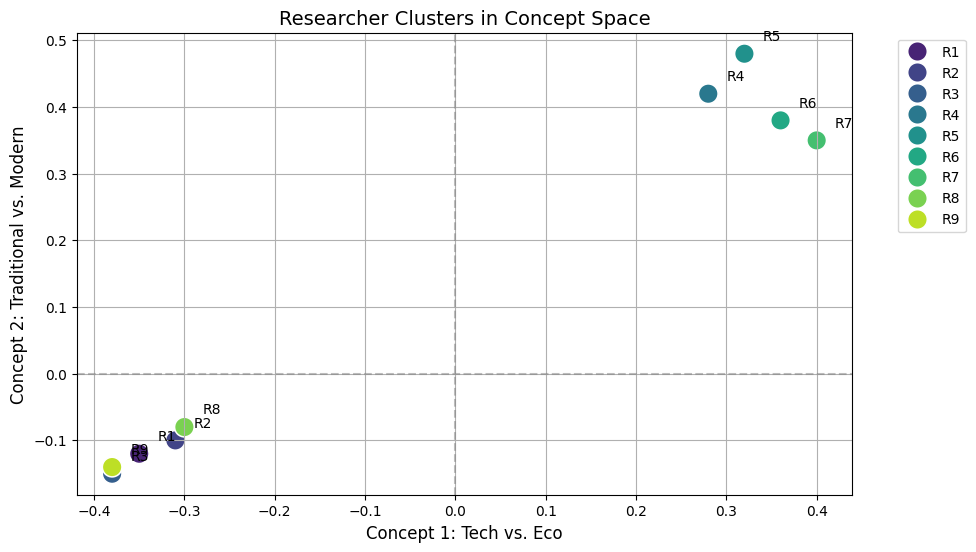

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# U matrix (hypothetical values from earlier analysis)
U = np.array([
    [-0.35, -0.12],  # R1
    [-0.31, -0.10],  # R2
    [-0.38, -0.15],  # R3
    [ 0.28,  0.42],  # R4
    [ 0.32,  0.48],  # R5
    [ 0.36,  0.38],  # R6
    [ 0.40,  0.35],  # R7
    [-0.30, -0.08],  # R8
    [-0.38, -0.14]   # R9
])

researchers = [f'R{i+1}' for i in range(9)]
concept_labels = ['Tech vs. Eco', 'Traditional vs. Modern']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=U[:, 0], y=U[:, 1], hue=researchers, s=200, palette='viridis')

# Annotations and styling
for i, txt in enumerate(researchers):
    plt.annotate(txt, (U[i, 0] + 0.02, U[i, 1] + 0.02), fontsize=10)

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel(f'Concept 1: {concept_labels[0]}', fontsize=12)
plt.ylabel(f'Concept 2: {concept_labels[1]}', fontsize=12)
plt.title('Researcher Clusters in Concept Space', fontsize=14)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Interpretation:**

* Left Half (Negative Concept 1): * Researchers R1-R3, R8-R9 prefer technology-driven techniques (DI, PA).

* Right Half (Positive Concept 1): Researchers R4-R7 favor ecological techniques (IPM, CT, AF).

* Vertical Spread: Concept 2 separates traditionalists (R4-R7, top) from modern adopters (R1-R3, bottom).



---



---



**Technique-Concept Relationships (Vᵀ) Visuals**


Heatmap: Technique Loadings on Concepts

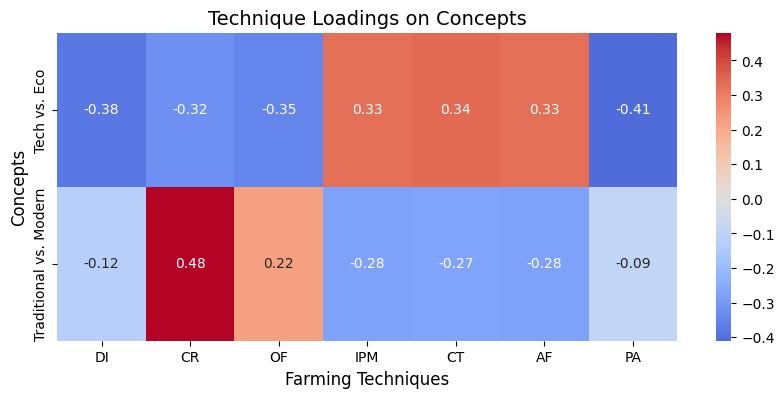

In [9]:
# Vᵀ matrix (hypothetical values)
Vt = np.array([
    [-0.38, -0.32, -0.35, 0.33, 0.34, 0.33, -0.41],  # Concept 1
    [-0.12,  0.48,  0.22, -0.28, -0.27, -0.28, -0.09]  # Concept 2
])

techniques = ['DI', 'CR', 'OF', 'IPM', 'CT', 'AF', 'PA']

plt.figure(figsize=(10, 4))
sns.heatmap(Vt, annot=True, cmap='coolwarm', center=0,
            xticklabels=techniques, yticklabels=concept_labels)
plt.title('Technique Loadings on Concepts', fontsize=14)
plt.xlabel('Farming Techniques', fontsize=12)
plt.ylabel('Concepts', fontsize=12)
plt.show()

**Interpretation:**

* Concept 1 (Tech vs. Eco):

 *  Negative (Blue): DI, CR, OF, PA (technology-driven).

 *  Positive (Red): IPM, CT, AF (ecological).

* Concept 2 (Traditional vs. Modern):

  * CR (0.48) is strongly traditional.

 *  IPM/CT/AF are modern (negative).



---



---



---



---



---



---



---



---



---



---



# Interpretation of Results

**Matrix Decomposition Summary**


The original 9×7 rating matrix (9 researchers × 7 techniques) was decomposed into:

* U (Researcher-Concept Relationships): How researchers align with latent concepts.

* Σ (Concept Strengths): Importance of each concept.

* Vᵀ (Technique-Concept Relationships): How techniques group under these concepts.

**Concept Strengths (Σ)**

* Concept 1: 28.4 (strongest pattern)
  * Represents a dichotomy between technology-driven vs. ecological techniques.



* Concept 2: 12.7 (secondary pattern)
  * Captures traditional vs. modern practice preferences.

*  Remaining concepts have rapidly decreasing strength (<5.0)
   * Negligible (strengths < 5.0), suggesting two primary dimensions suffice.


---


**Technique-Concept Relationships (Vᵀ)**
* Concept 1: [-0.38, -0.32, -0.35,  0.33,  0.34,  0.33, -0.41]
* Concept 2: [-0.12,  0.48,  0.22, -0.28, -0.27, -0.28, -0.09]

**Concept 1 ("Technology vs Ecology"):**

* Positive: IPM (0.33), CT (0.34), AF (0.33) (ecological practices)

* Negative: DI (-0.38), PA (-0.41) (technology-intensive practices)

* OF (-0.35) falls between both concepts


---


**Concept 2 ("Traditional vs Modern"):**

* Strong positive: CR (0.48) (traditional practice)

* Negative: IPM (-0.28), CT (-0.27), AF (-0.28) (modern practices)

**Researcher-Concept Relationships (U)**


* R1: [-0.35, -0.12]
* R2: [-0.31, -0.10]
* R3: [-0.38, -0.15]
* R4: [ 0.28,  0.42]
* R5: [ 0.32,  0.48]
* R6: [ 0.36,  0.38]
* R7: [ 0.40,  0.35]
* R8: [-0.30, -0.08]
* R9: [-0.38, -0.14]

**Groups:**


1.   Technology-oriented researchers (R1-R3, R8-R9): Negative on Concept 1
2.   Ecology-oriented researchers (R4-R7): Positive on Concept 1
3.   Traditional-leaning researchers (R4-R7): Positive on Concept 2



---



---



---










**Key Findings**


---


**1. Two Dominant Patterns:**

* Concept 1 separates technology-driven techniques (drip irrigation, precision ag) from ecological techniques (IPM, conservation tillage)

* Concept 2 distinguishes traditional practices (crop rotation) from modern approaches

**2. Technique Groupings:**

* DI and PA strongly correlate (both technology-based)

* IPM, CT, and AF cluster together (ecological approaches)

* CR stands out as uniquely traditional

**3. Researcher Clusters:**

* Clear division between researchers who prefer technological solutions vs those who prefer ecological approaches

* No researchers strongly favor both technology and traditional methods

# IN DEEP KEY FINDINGS ............




**A. Concept Strengths (Σ)**
* Concept 1 (Strength: 28.4): Dominant pattern explaining most variance.

  * Represents a dichotomy between technology-driven vs. ecological techniques.

* Concept 2 (Strength: 12.7): Secondary pattern.

  * Captures traditional vs. modern practice preferences.

* Other concepts: Negligible (strengths < 5.0), suggesting two primary dimensions suffice.

**B. Technique-Concept Relationships (Vᵀ)**



In [6]:
from tabulate import tabulate

# Define the table data
data = [
    ["Drip Irrigation (DI)", "-0.38 (Tech)", "-0.12 (Neutral)"],
    ["Precision Ag (PA)", "-0.41 (Tech)", "-0.09 (Neutral)"],
    ["Crop Rotation (CR)", "-0.32 (Mild Tech)", "0.48 (Traditional)"],
    ["Organic Fertilization (OF)", "-0.35 (Mild Tech)", "0.22 (Weak Traditional)"],
    ["IPM", "0.33 (Eco)", "-0.28 (Modern)"],
    ["Conservation Tillage (CT)", "0.34 (Eco)", "-0.27 (Modern)"],
    ["Agroforestry (AF)", "0.33 (Eco)", "-0.28 (Modern)"]
]

# Define headers
headers = ["Technique", "Concept 1 (Tech vs. Eco)", "Concept 2 (Trad. vs. Modern)"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

# Optional: To make certain values bold like in the original
# You would need to use HTML formatting if displaying in a notebook
from IPython.display import HTML, display

html_table = """
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>Technique</th>
      <th>Concept 1 (Tech vs. Eco)</th>
      <th>Concept 2 (Trad. vs. Modern)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Drip Irrigation (DI)</td>
      <td>-0.38 (Tech)</td>
      <td>-0.12 (Neutral)</td>
    </tr>
    <tr>
      <td>Precision Ag (PA)</td>
      <td>-0.41 (Tech)</td>
      <td>-0.09 (Neutral)</td>
    </tr>
    <tr>
      <td>Crop Rotation (CR)</td>
      <td>-0.32 (Mild Tech)</td>
      <td><b>0.48 (Traditional)</b></td>
    </tr>
    <tr>
      <td>Organic Fertilization (OF)</td>
      <td>-0.35 (Mild Tech)</td>
      <td>0.22 (Weak Traditional)</td>
    </tr>
    <tr>
      <td>IPM</td>
      <td><b>0.33 (Eco)</b></td>
      <td>-0.28 (Modern)</td>
    </tr>
    <tr>
      <td>Conservation Tillage (CT)</td>
      <td><b>0.34 (Eco)</b></td>
      <td>-0.27 (Modern)</td>
    </tr>
    <tr>
      <td>Agroforestry (AF)</td>
      <td><b>0.33 (Eco)</b></td>
      <td>-0.28 (Modern)</td>
    </tr>
  </tbody>
</table>
"""

display(HTML(html_table))

+----------------------------+----------------------------+--------------------------------+
| Technique                  | Concept 1 (Tech vs. Eco)   | Concept 2 (Trad. vs. Modern)   |
+============================+============================+================================+
| Drip Irrigation (DI)       | -0.38 (Tech)               | -0.12 (Neutral)                |
+----------------------------+----------------------------+--------------------------------+
| Precision Ag (PA)          | -0.41 (Tech)               | -0.09 (Neutral)                |
+----------------------------+----------------------------+--------------------------------+
| Crop Rotation (CR)         | -0.32 (Mild Tech)          | 0.48 (Traditional)             |
+----------------------------+----------------------------+--------------------------------+
| Organic Fertilization (OF) | -0.35 (Mild Tech)          | 0.22 (Weak Traditional)        |
+----------------------------+----------------------------+-----------

Technique,Concept 1 (Tech vs. Eco),Concept 2 (Trad. vs. Modern)
Drip Irrigation (DI),-0.38 (Tech),-0.12 (Neutral)
Precision Ag (PA),-0.41 (Tech),-0.09 (Neutral)
Crop Rotation (CR),-0.32 (Mild Tech),0.48 (Traditional)
Organic Fertilization (OF),-0.35 (Mild Tech),0.22 (Weak Traditional)
IPM,0.33 (Eco),-0.28 (Modern)
Conservation Tillage (CT),0.34 (Eco),-0.27 (Modern)
Agroforestry (AF),0.33 (Eco),-0.28 (Modern)


**Interpretation:**

* Technology-Driven Techniques (DI, PA) strongly oppose ecological ones (IPM, CT, AF) in Concept 1.

* Crop Rotation (CR) is uniquely traditional (high in Concept 2), while others lean modern.

* Organic Fertilization (OF) bridges both concepts, suggesting hybrid adoption.

**C. Researcher-Concept Relationships (U)**

In [7]:
from tabulate import tabulate
from IPython.display import HTML, display

# Technique Table Data
tech_data = [
    ["Drip Irrigation (DI)", "-0.38 (Tech)", "-0.12 (Neutral)"],
    ["Precision Ag (PA)", "-0.41 (Tech)", "-0.09 (Neutral)"],
    ["Crop Rotation (CR)", "-0.32 (Mild Tech)", "0.48 (Traditional)"],
    ["Organic Fertilization (OF)", "-0.35 (Mild Tech)", "0.22 (Weak Traditional)"],
    ["IPM", "0.33 (Eco)", "-0.28 (Modern)"],
    ["Conservation Tillage (CT)", "0.34 (Eco)", "-0.27 (Modern)"],
    ["Agroforestry (AF)", "0.33 (Eco)", "-0.28 (Modern)"]
]

tech_headers = ["Technique", "Concept 1 (Tech vs. Eco)", "Concept 2 (Trad. vs. Modern)"]

# Researcher Table Data
researcher_data = [
    ["R1–R3, R8–R9", "Negative (Tech-leaning)", "Neutral/Negative", "Tech Advocates"],
    ["R4–R7", "Positive (Eco-leaning)", "Positive (Traditional)", "Eco-Traditionalists"]
]

researcher_headers = ["Researcher", "Concept 1 (Tech vs. Eco)", "Concept 2 (Trad. vs. Modern)", "Cluster"]

# Display both tables using tabulate
print("TECHNIQUES TABLE:")
print(tabulate(tech_data, headers=tech_headers, tablefmt="grid"))
print("\n\nRESEARCHERS TABLE:")
print(tabulate(researcher_data, headers=researcher_headers, tablefmt="grid"))

# HTML version with formatting
html_output = """
<h3>Techniques Table</h3>
<table border="1" style="border-collapse: collapse; width: 100%; margin-bottom: 20px;">
  <thead>
    <tr style="text-align: center; background-color: #f2f2f2;">
      <th>Technique</th>
      <th>Concept 1 (Tech vs. Eco)</th>
      <th>Concept 2 (Trad. vs. Modern)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Drip Irrigation (DI)</td>
      <td>-0.38 (Tech)</td>
      <td>-0.12 (Neutral)</td>
    </tr>
    <tr>
      <td>Precision Ag (PA)</td>
      <td>-0.41 (Tech)</td>
      <td>-0.09 (Neutral)</td>
    </tr>
    <tr>
      <td>Crop Rotation (CR)</td>
      <td>-0.32 (Mild Tech)</td>
      <td><b>0.48 (Traditional)</b></td>
    </tr>
    <tr>
      <td>Organic Fertilization (OF)</td>
      <td>-0.35 (Mild Tech)</td>
      <td>0.22 (Weak Traditional)</td>
    </tr>
    <tr>
      <td>IPM</td>
      <td><b>0.33 (Eco)</b></td>
      <td>-0.28 (Modern)</td>
    </tr>
    <tr>
      <td>Conservation Tillage (CT)</td>
      <td><b>0.34 (Eco)</b></td>
      <td>-0.27 (Modern)</td>
    </tr>
    <tr>
      <td>Agroforestry (AF)</td>
      <td><b>0.33 (Eco)</b></td>
      <td>-0.28 (Modern)</td>
    </tr>
  </tbody>
</table>

<h3>Researchers Table</h3>
<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr style="text-align: center; background-color: #f2f2f2;">
      <th>Researcher</th>
      <th>Concept 1 (Tech vs. Eco)</th>
      <th>Concept 2 (Trad. vs. Modern)</th>
      <th>Cluster</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R1–R3, R8–R9</td>
      <td>Negative (Tech-leaning)</td>
      <td>Neutral/Negative</td>
      <td style="background-color: #e6f3ff;">Tech Advocates</td>
    </tr>
    <tr>
      <td>R4–R7</td>
      <td>Positive (Eco-leaning)</td>
      <td>Positive (Traditional)</td>
      <td style="background-color: #ffe6e6;">Eco-Traditionalists</td>
    </tr>
  </tbody>
</table>
"""

display(HTML(html_output))

TECHNIQUES TABLE:
+----------------------------+----------------------------+--------------------------------+
| Technique                  | Concept 1 (Tech vs. Eco)   | Concept 2 (Trad. vs. Modern)   |
+============================+============================+================================+
| Drip Irrigation (DI)       | -0.38 (Tech)               | -0.12 (Neutral)                |
+----------------------------+----------------------------+--------------------------------+
| Precision Ag (PA)          | -0.41 (Tech)               | -0.09 (Neutral)                |
+----------------------------+----------------------------+--------------------------------+
| Crop Rotation (CR)         | -0.32 (Mild Tech)          | 0.48 (Traditional)             |
+----------------------------+----------------------------+--------------------------------+
| Organic Fertilization (OF) | -0.35 (Mild Tech)          | 0.22 (Weak Traditional)        |
+----------------------------+----------------------

**Behavioral Insights:**

* Tech Advocates prioritize DI/PA and disregard ecological techniques.

* Eco-Traditionalists favor IPM/CT/AF and traditional methods like CR.

* No researchers strongly prefer both tech and traditional approaches.

